### 1 : Importing Libraries

In [1]:
# ignore the warnings in the output
import warnings
warnings.filterwarnings("ignore")

In [2]:
# import libraries and packages
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import mlflow
from pycaret.classification import *

 ### 2 Reading Data

In [3]:
##Copy the cleaned data obtained from the data_cleaning notebook into the Data folder before proceeding
%time
dataset = pd.read_csv('Data/cleaned_data.csv')

CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 8.11 µs


In [7]:
dataset.head()

created_date  city_tier first_platform_c first_utm_medium_c  \
0  2021-07-01 00:08:15        1.0           Level0            Level11   
1  2021-07-01 00:16:43        2.0           Level3             Level0   
2  2021-07-01 00:22:20        1.0           Level3             Level0   
3  2021-07-01 00:23:13        1.0           Level1             Level3   
4  2021-07-01 00:28:38        1.0           Level3             Level0   

  first_utm_source_c  total_leads_droppped  referred_lead  app_complete_flag  \
0             Level2                   1.0            0.0                  1   
1             others                   1.0            0.0                  1   
2             Level0                   1.0            0.0                  1   
3             others                   2.0            0.0                  0   
4             Level0                   1.0            0.0                  0   

   assistance_interaction  career_interaction  payment_interaction  \
0                     0.0                 0.0                  0.0   
1                     0.0                 0.0                  0.0   
2                     0.0                 0.0                  0.0   
3                     0.0                 0.0                  0.0   
4                     0.0                 0.0                  0.0   

   social_interaction  syllabus_interaction  
0                 0.0                   0.0  
1                 0.0                   0.0  
2                 0.0                   0.0  
3                 0.0                   0.0  
4                 0.0                   0.0

In [5]:
# drop the data column as it is not needed for training
dataset = dataset.drop(['created_date'], axis=1)

### 3 Setting up Environment: 

In [6]:
# create a connection and setup a SQLite database with the name "lead_scoring_model_experimentation.db" in 
# 'Assignment/02_training_pipeline/notebooks/' location

import sqlite3
from sqlite3 import Error

def create_sqlite_connection(db_file):
    """ create a database connection to a SQLite database """
    conn = None
    # opening the conncetion for creating the sqlite db
    try:
        conn = sqlite3.connect(db_file)
        print(sqlite3.version)
    # return an error if connection not established
    except Error as e:
        print(e)
    # closing the connection once the database is created
    finally:
        if conn:
            conn.close()

In [7]:
create_sqlite_connection('lead_scoring_model_experimentation.db')

2.6.0


In [ ]:
'''
Now you need to start the MLflow server in a new terminal. 
Note: Before you start the MLflow server, create a folder named mlruns in the assignment directory.
Now you need to run the command to start MLflow server such that:
1. The lead_scoring_model_experimentation.db which you created above is used as the backend-store.
2. mlruns folder is used as an artifact directory. 
3. The server runs on the port 6006.

The steps to do so are as follows:
Open a new terminal.
Then go to the Assignment directory using the cd command. Type the command: cd Assignment/
Create a folder named mlruns here. You can create this folder using either the command line or GUI. To create this folder via the command line run the command: mkdir ./mlruns
Then, type the following command to start the MLflow server: 
mlflow server --backend-store-uri='sqlite:///./02_training_pipeline/notebooks/lead_scoring_model_experimentation.db' --default-artifact-root="./mlruns" --port=6006 --host=0.0.0.0
'''

In [8]:
# Once, your server is successfully running, create a mlflow tracking uri at "http://0.0.0.0:6006"
mlflow.set_tracking_uri('http://0.0.0.0:6006')

In [9]:
dataset.head()

city_tier first_platform_c first_utm_medium_c first_utm_source_c  \
0        1.0           Level0            Level11             Level2   
1        2.0           Level3             Level0             others   
2        1.0           Level3             Level0             Level0   
3        1.0           Level1             Level3             others   
4        1.0           Level3             Level0             Level0   

   total_leads_droppped  referred_lead  app_complete_flag  \
0                   1.0            0.0                  1   
1                   1.0            0.0                  1   
2                   1.0            0.0                  1   
3                   2.0            0.0                  0   
4                   1.0            0.0                  0   

   assistance_interaction  career_interaction  payment_interaction  \
0                     0.0                 0.0                  0.0   
1                     0.0                 0.0                  0.0   
2                     0.0                 0.0                  0.0   
3                     0.0                 0.0                  0.0   
4                     0.0                 0.0                  0.0   

   social_interaction  syllabus_interaction  
0                 0.0                   0.0  
1                 0.0                   0.0  
2                 0.0                   0.0  
3                 0.0                   0.0  
4                 0.0                   0.0

In [10]:
# setup pycaret 

base_model_1 = setup(data = dataset, 
      target = 'app_complete_flag', 
      session_id = 42,
      fix_imbalance=False,
      n_jobs=-1,
      use_gpu=True,
      log_experiment=True,
      experiment_name='base_model_1',
      log_plots=True, 
      log_data=True,
      silent=True, 
      verbose=True,
      log_profile=False)

2024/12/13 03:58:22 INFO mlflow.tracking.fluent: Experiment with name 'base_model_1' does not exist. Creating a new experiment.


### 4 : Model Experimentation with pycaret

In [12]:
# create a experimentation with pycaret and exclude ['gbc','knn','qda', 'dummy', 'svm', 'ada']
base_model = compare_models(exclude = ['gbc','knn','qda', 'dummy', 'svm', 'ada'], fold=5)

In [13]:
# create a model which gives the highest accuracy
xgb_model = create_model('xgboost', fold=5)

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif


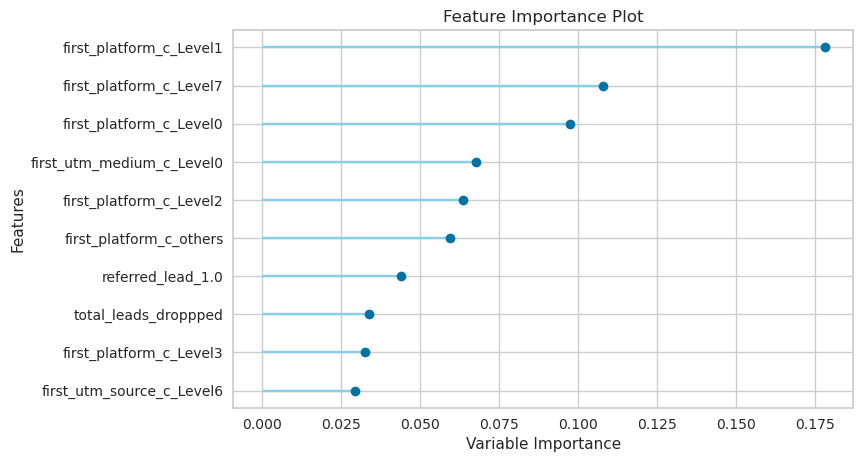

In [14]:
# create feature importance plot
plot_model(xgb_model, plot='feature')

### 5 : Model Experimentation after dropping features

From the above feature tests we can claerly see that some of the features are not significant. We will now drop all the insignificant features and select only the significant ones.
The list of the significant features is 
['total_leads_droppped', 'city_tier', 'referred_lead', 'app_complete_flag', 'first_platform_c', 'first_utm_medium_c', 'first_utm_source_c'].
So now you will train your model with onlly these features.

Also note that in our previous experiments we saw that tree based models are our top performers. In case of tree based models we do not require transformationss normalization, scaling etc. So make sure that you use setup pycaret in the proper way. i.e, make sure that you use normalize = False and transformation = False.

In [16]:
dataset.head()

city_tier first_platform_c first_utm_medium_c first_utm_source_c  \
0        1.0           Level0            Level11             Level2   
1        2.0           Level3             Level0             others   
2        1.0           Level3             Level0             Level0   
3        1.0           Level1             Level3             others   
4        1.0           Level3             Level0             Level0   

   total_leads_droppped  referred_lead  app_complete_flag  \
0                   1.0            0.0                  1   
1                   1.0            0.0                  1   
2                   1.0            0.0                  1   
3                   2.0            0.0                  0   
4                   1.0            0.0                  0   

   assistance_interaction  career_interaction  payment_interaction  \
0                     0.0                 0.0                  0.0   
1                     0.0                 0.0                  0.0   
2                     0.0                 0.0                  0.0   
3                     0.0                 0.0                  0.0   
4                     0.0                 0.0                  0.0   

   social_interaction  syllabus_interaction  
0                 0.0                   0.0  
1                 0.0                   0.0  
2                 0.0                   0.0  
3                 0.0                   0.0  
4                 0.0                   0.0

In [17]:
# 
# ['total_leads_droppped', 'city_tier', 'referred_lead', 'app_complete_flag', 'first_platform_c', 'first_utm_medium_c', 'first_utm_source_c']
#
# Train the model using the features listed above. Since we are using tree models we do not require any transformaions 
# such as normalization, scaling etc.So make sure that you use setup pycaret in the proper way. i.e, make sure that you use 
# normalize = False and transformation = False.

new_dataset = dataset[['total_leads_droppped', 'city_tier', 'referred_lead', 'app_complete_flag', 'first_platform_c', 'first_utm_medium_c', 'first_utm_source_c']]
new_dataset.head()

total_leads_droppped  city_tier  referred_lead  app_complete_flag  \
0                   1.0        1.0            0.0                  1   
1                   1.0        2.0            0.0                  1   
2                   1.0        1.0            0.0                  1   
3                   2.0        1.0            0.0                  0   
4                   1.0        1.0            0.0                  0   

  first_platform_c first_utm_medium_c first_utm_source_c  
0           Level0            Level11             Level2  
1           Level3             Level0             others  
2           Level3             Level0             Level0  
3           Level1             Level3             others  
4           Level3             Level0             Level0

In [18]:
base_model_2 = setup(data = new_dataset, 
      target = 'app_complete_flag', 
      session_id = 42,
      fix_imbalance=False,
      n_jobs=-1,
      use_gpu=True,
      log_experiment=True,
      experiment_name='base_model_2',
      log_plots=True, 
      log_data=True,
      silent=True, 
      verbose=True,
      log_profile=False)

2024/12/13 04:24:19 INFO mlflow.tracking.fluent: Experiment with name 'base_model_2' does not exist. Creating a new experiment.


In [19]:
# create a experimentation with pycaret and exclude ['gbc','knn','qda', 'dummy', 'svm', 'ada']. 
base_model = compare_models(exclude = ['gbc','knn','qda', 'dummy', 'svm', 'ada'], fold=5)

In [20]:
# You should get lightgbm as the best performing model. So now we will train a lightGBM model manually using pycaret
lgbm_model = create_model('lightgbm', fold = 5)

In [21]:
# Tune the hyper parameters of the lightgbm model using optuna on 10 folds and optimise AUC as that was our system metric, 
# hence we will optimise AUC

tuned_lgbm, tuner_0 = tune_model(lgbm_model, 
                            fold = 10,
                            optimize = 'AUC', 
                            choose_better = True, 
                            return_tuner=True)

In [22]:
# Print the final models configuration so that we can use it in the model retraining pipeline 
tuned_lgbm

LGBMClassifier(bagging_fraction=0.6, bagging_freq=3, boosting_type='gbdt',
               class_weight=None, colsample_bytree=1.0, device='gpu',
               feature_fraction=0.7, importance_type='split', learning_rate=0.2,
               max_depth=-1, min_child_samples=81, min_child_weight=0.001,
               min_split_gain=0.1, n_estimators=90, n_jobs=-1, num_leaves=40,
               objective=None, random_state=42, reg_alpha=0.0005,
               reg_lambda=0.7, silent='warn', subsample=1.0,
               subsample_for_bin=200000, subsample_freq=0)